[  1.56445553e-01   7.66895858e-03   1.34536543e-02   7.28954587e-03
   9.92133690e-03   6.25377243e-03   1.58667982e-04   1.60471998e-01
   4.22975276e-03   9.98026594e-04   3.85733615e-04   9.75030807e-04
   3.60977682e-03   2.96197207e-03   3.52591594e-03   3.85064202e-03
   1.76422766e-02   5.14073073e-03   1.41110239e-02   1.28916284e-02
   1.64070948e-05   9.21682324e-03   6.56206902e-03   3.41659023e-02
   7.09487766e-04   8.62456113e-02   1.37749363e-03   3.32221275e-02
   2.87105972e-03   2.62294035e-03   1.00302896e-06   9.36791299e-03
   1.81029017e-02   5.44122252e-03   4.17967354e-03   4.64504643e-03
   1.13335231e-02   1.89614117e-04   1.39762784e-02   3.64148431e-03
   7.69643452e-03   4.49530388e-03   5.47820620e-03   1.48345708e-02
   2.76612912e-03   2.44565146e-02   7.70739129e-03   8.71743871e-03
   3.05365990e-03   4.96465978e-03   1.04669547e-03   6.93810628e-03
   2.67824414e-02   5.91814132e-02   2.25053970e-02   9.37819762e-02
   1.20077738e-03   4.26991860e-04

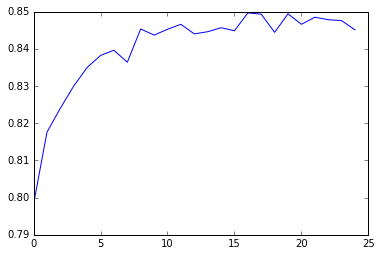

In [3]:
%matplotlib inline
# import libraries: dataframe manipulation, machine learning, os tools
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
 # Feature Importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

# change working directory to where the dataset is
os.chdir("C:/Users/JD87417/Desktop/python work/Coursera")

# Load the dataset (http://archive.ics.uci.edu/ml/datasets/Adult)
AH_data = pd.read_csv("adult2_income.csv")
data_clean = AH_data.dropna()

# encode categorical features

#done in R for simplicity for right now (C:\Users\JD87417\Desktop\python work\Coursera\python_adult2_clean.R)
# (http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)


# summary statistics including counts, mean, stdev, quartiles
data_clean.head(n=5)
data_clean.dtypes # data types of each variable
data_clean.describe()

# Split into training and testing sets
# Specifying predictor x variables
predictors = data_clean[["age", "workclassLocal-gov", "workclassPrivate", 
"workclassSelf-emp-inc", "workclassSelf-emp-not-inc", "workclassState-gov", 
"workclassWithout-pay", "fnlwgt", "education11th", "education12th", 
"education1st-4th", "education5th-6th", "education7th-8th", "education9th", 
"educationAssoc-acdm", "educationAssoc-voc", "educationBachelors", 
"educationDoctorate", "educationHS-grad", "educationMasters", 
"educationPreschool", "educationProf-school", "educationSome-college", 
"education_num", "martial_statusMarried-AF-spouse", "martial_statusMarried-civ-spouse", 
"martial_statusMarried-spouse-absent", "martial_statusNever-married", 
"martial_statusSeparated", "martial_statusWidowed", "occupationArmed-Forces", 
"occupationCraft-repair", "occupationExec-managerial", "occupationFarming-fishing", 
"occupationHandlers-cleaners", "occupationMachine-op-inspct", 
"occupationOther-service", "occupationPriv-house-serv", "occupationProf-specialty", 
"occupationProtective-serv", "occupationSales", "occupationTech-support", 
"occupationTransport-moving", "relationshipNot-in-family", "relationshipOther-relative", 
"relationshipOwn-child", "relationshipUnmarried", "relationshipWife", 
"raceAsian-Pac-Islander", "raceBlack", "raceOther", "raceWhite", 
"sexMale", "capital_gain", "capital_loss", "hours_per_week", 
"native_countryCanada", "native_countryChina", "native_countryColumbia", 
"native_countryCuba", "native_countryDominican-Republic", "native_countryEcuador", 
"native_countryEl-Salvador", "native_countryEngland", "native_countryFrance", 
"native_countryGermany", "native_countryGreece", "native_countryGuatemala", 
"native_countryHaiti", "native_countryHoland-Netherlands", "native_countryHonduras", 
"native_countryHong", "native_countryHungary", "native_countryIndia", 
"native_countryIran", "native_countryIreland", "native_countryItaly", 
"native_countryJamaica", "native_countryJapan", "native_countryLaos", 
"native_countryMexico", "native_countryNicaragua", "native_countryOutlying-US(Guam-USVI-etc)", 
"native_countryPeru", "native_countryPhilippines", "native_countryPoland", 
"native_countryPortugal", "native_countryPuerto-Rico", "native_countryScotland", 
"native_countrySouth", "native_countryTaiwan", "native_countryThailand", 
"native_countryTrinadad&Tobago", "native_countryUnited-States", 
"native_countryVietnam", "native_countryYugoslavia"]]

# y repsonse variable
targets = data_clean.income_target_50k

# concurrent split of x's, y, at 40%
pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors, targets, test_size=.4)

# shape/dimensions of the DataFrame
pred_train.shape
pred_test.shape
tar_train.shape
tar_test.shape

# Build model on training data
from sklearn.ensemble import RandomForestClassifier

# n_estimators is the amount of trees to build
classifier=RandomForestClassifier(n_estimators=25)
# fit the RandomForest Model
classifier=classifier.fit(pred_train,tar_train)
# prediction scoring of the model (array of binary 0-1)
predictions=classifier.predict(pred_test)
# confusion matrix / missclassification matrix
sklearn.metrics.confusion_matrix(tar_test,predictions)
sklearn.metrics.accuracy_score(tar_test, predictions)


# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)
# display the relative importance of each attribute
print(model.feature_importances_)


"""
Running a different number of trees and see the effect
 of that on the accuracy of the prediction
"""

trees=range(25)
accuracy=np.zeros(25)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   classifier=classifier.fit(pred_train,tar_train)
   predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
   
plt.cla()
plt.plot(trees, accuracy)

